In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import datetime
import os
import re

def get_subsample_fraction(adata,cluster_string,target_cluster,subsample_factor):
    adata_target = adata[adata.obs[cluster_string] == target_cluster]
    adata_rest = adata[adata.obs[cluster_string] != target_cluster]
    sc.pp.subsample(adata_rest,n_obs = 15*len(adata_target))
    adata_sub = adata_rest.concatenate(adata_target)
    return adata_sub

def get_subsample_fraction_final_obs(adata,cluster_string,target_cluster,fraction,final_obs):
    adata_target = adata[adata.obs[cluster_string] == target_cluster]
    adata_rest = adata[adata.obs[cluster_string] != target_cluster]
    n_obs_targets = int(fraction*final_obs)
    n_obs_rest = int((1-fraction)*final_obs)
    sc.pp.subsample(adata_target,n_obs = n_obs_targets)
    sc.pp.subsample(adata_rest,n_obs = n_obs_rest)
    adata_sub = adata_rest.concatenate(adata_target)
    return adata_sub

def get_fraction(adata,cluster_string,cluster_name):
    total_all = len(adata)
    total_cluster = adata.obs[cluster_string].value_counts()[cluster_name]
    return total_cluster/total_all

sc.logging.print_versions()
sc.settings.verbosity = 3 
now = datetime.datetime.now()
today = now.strftime("%Y%m%d")

df_anno = pd.read_csv('./data_Tcells_annotated.csv')
var_names = ['CD45',
       'CD3', 'CD19', 'CD15', 'CD8', 'TCRgd', 'CD62L', 'CD45RO', 'CD28',
       'CD27', 'CD226', 'ICOS', 'PD1', 'Lag3', 'TIGIT', 'CD96', 'CD25', 'CD56',
       'HLADR', 'CD38', 'CD137', 'CD69', 'Ki67', 'CXCR3', 'CXCR5', 'CCR6',
       'CRTH2', 'KLRB1', 'KLRG1', 'KLRF1', 'CD95', 'CD10', 'CD16', 'CD34',
       'CD123', 'CD11c', 'CD21', 'CD14', 'IgD', 'IgM']
adata_anno = ann.AnnData(X=df_anno[var_names], obs= df_anno[['cellid', 'Run', 'FCS.Filename', 'id', 'Individuals', 'Group',
       'Severity', 'Disease.phase', 'max. WHO scale', 'sev_merge',
       'Days.post.symptom.onset', 'Week', 'sev_week', 'followup', 'Tcellcompartment',
       'pheno_acute', 'metacluster_num', 'metacluster_name', 'new_clust_name',
       'new_clust_num']]) 

df_umap = df_anno[['UMAP1', 'UMAP2']]
df_umap.index = adata_anno.obs_names
adata_anno.obsm['X_umap'] = df_umap.to_numpy()

cofactor = 5
adata_anno.X = adata_anno.X/cofactor
adata_anno.X = np.arcsinh(adata_anno.X)

#----------------------------------------------------------------------------------------
adata_CV19 = adata_anno[adata_anno.obs['Group'] == 'CV19']


'''
#adata_CV19_CD4 = adata_CV19[adata_CV19.obs['Tcellcompartment'] == 'CD4+']
adata_CV19_CD4_C8 = adata_CV19[adata_CV19.obs['new_clust_num'] == 'C8']
adata_CV19_CD4_rest = adata_CV19[adata_CV19.obs['new_clust_num'] != 'C8']
sc.pp.subsample(adata_CV19_CD4_rest,n_obs = 15*len(adata_CV19_CD4_C8))
adata_CV19_CD4_sub = adata_CV19_CD4_rest.concatenate(adata_CV19_CD4_C8)



#adata_CV19_CD8 = adata_CV19[adata_CV19.obs['Tcellcompartment'] == 'CD8+']
adata_CV19_CD8_C26 = adata_CV19[adata_CV19.obs['new_clust_num'] == 'C26']
adata_CV19_CD8_rest = adata_CV19[adata_CV19.obs['new_clust_num'] != 'C26']
sc.pp.subsample(adata_CV19_CD8_rest,n_obs = 15*len(adata_CV19_CD8_C26))
adata_CV19_CD8_sub = adata_CV19_CD8_rest.concatenate(adata_CV19_CD8_C26)
'''

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.0
colorama                    0.4.4
convexgating                NA
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.2
google                      NA
h5py                        3.7.0
igraph                      0.9.11
ipykernel                   6.9.0
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
joblib                      1.1.0
kiwisolver                  1.4.4
llvmlite                    0.39.0
louvain                     0.7.1
matplotlib                  3.5.2
mpl_toolkits                NA
natsort                     8.1.0
numba       

"\n#adata_CV19_CD4 = adata_CV19[adata_CV19.obs['Tcellcompartment'] == 'CD4+']\nadata_CV19_CD4_C8 = adata_CV19[adata_CV19.obs['new_clust_num'] == 'C8']\nadata_CV19_CD4_rest = adata_CV19[adata_CV19.obs['new_clust_num'] != 'C8']\nsc.pp.subsample(adata_CV19_CD4_rest,n_obs = 15*len(adata_CV19_CD4_C8))\nadata_CV19_CD4_sub = adata_CV19_CD4_rest.concatenate(adata_CV19_CD4_C8)\n\n\n\n#adata_CV19_CD8 = adata_CV19[adata_CV19.obs['Tcellcompartment'] == 'CD8+']\nadata_CV19_CD8_C26 = adata_CV19[adata_CV19.obs['new_clust_num'] == 'C26']\nadata_CV19_CD8_rest = adata_CV19[adata_CV19.obs['new_clust_num'] != 'C26']\nsc.pp.subsample(adata_CV19_CD8_rest,n_obs = 15*len(adata_CV19_CD8_C26))\nadata_CV19_CD8_sub = adata_CV19_CD8_rest.concatenate(adata_CV19_CD8_C26)\n"

## Joint panel 

In [3]:
import json
with open('/work/users/mh823zote/projects/gating/data/CITEseq_Covid/data/06_intersect_AB_cytof.json', 'r') as f:
    joint_panel = json.load(f)

In [6]:
adata_CV19 = adata_CV19[:,joint_panel]

## cluster 7 

before subsampling
--------------------------------------------------------------
number of cells : 1123832
target fraction : 0.023091529694829832
 
after subsampling
--------------------------------------------------------------
number of cells : 50000
target fraction : 0.0625
           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.579372     0.667781     0.679180     0.665052     0.664122
recall        0.803520     0.703360     0.625280     0.571200     0.556800
precision     0.453004     0.635628     0.743248     0.795809     0.822695


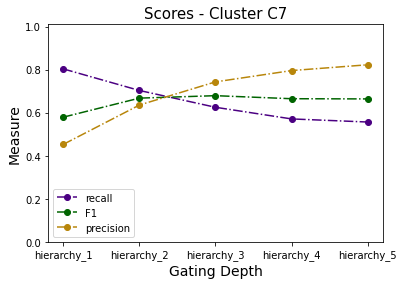

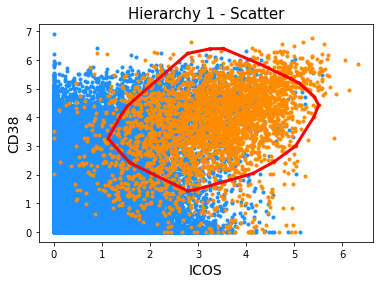

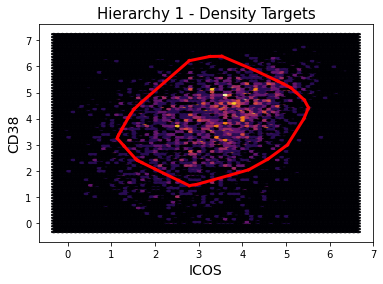

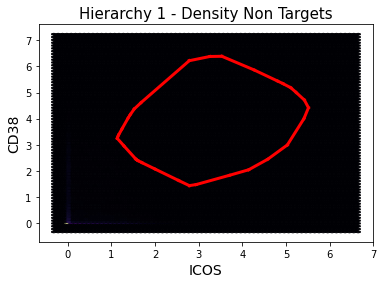

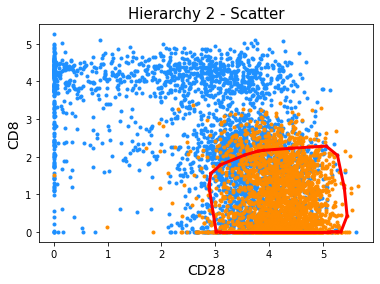

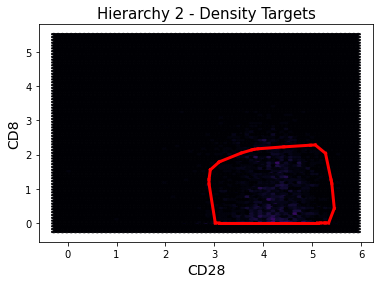

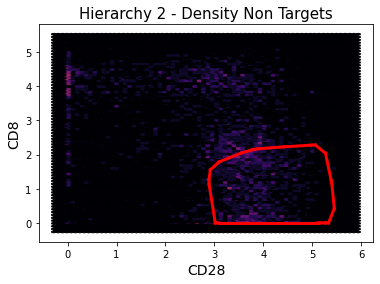

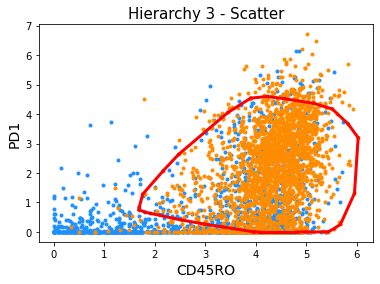

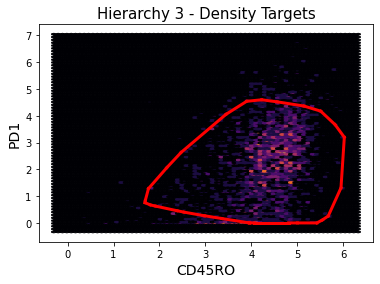

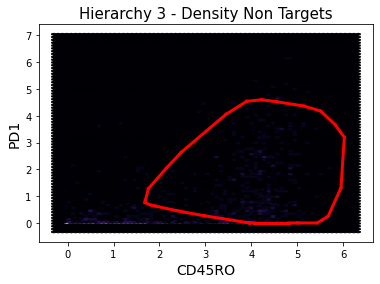

In [8]:
cluster_string = 'new_clust_num'
target_cluster = 'C7'
fraction = 0.0625
final_obs = 50000
print('before subsampling')
print('--------------------------------------------------------------')
print('number of cells : ' +str(len(adata_CV19)))
print('target fraction : ' +str(get_fraction(adata_CV19,cluster_string,target_cluster)))
adata_C7 = get_subsample_fraction_final_obs(adata_CV19,cluster_string,target_cluster,fraction,final_obs)
print(' ')
print('after subsampling')
print('--------------------------------------------------------------')
print('number of cells : ' +str(len(adata_C7)))
print('target fraction : ' +str(get_fraction(adata_C7,cluster_string,target_cluster)))
cg.tools.gating_strategy(adata_C7,[target_cluster],cluster_string = cluster_string,add_noise = True)

## cluster 25 

before subsampling
--------------------------------------------------------------
number of cells : 1123832
target fraction : 0.015891165227542907
 
after subsampling
--------------------------------------------------------------
number of cells : 50000
target fraction : 0.0625
           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.721451     0.766318     0.765042     0.724725     0.706545
recall        0.789440     0.738240     0.728320     0.653760     0.621760
precision     0.664243     0.796616     0.805664     0.812973     0.818105


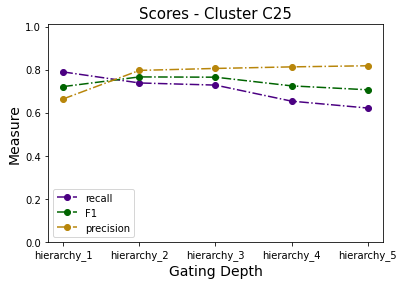

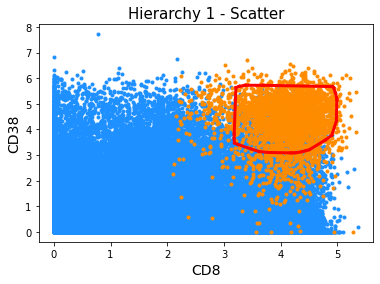

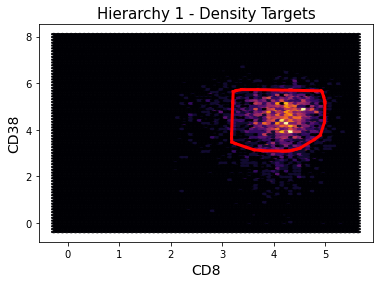

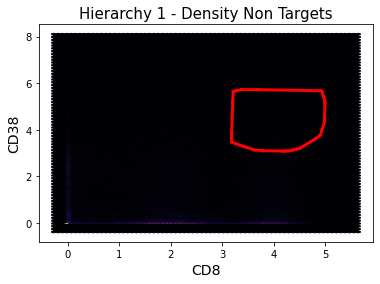

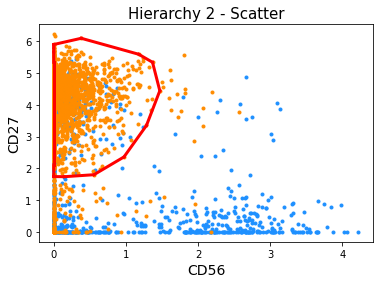

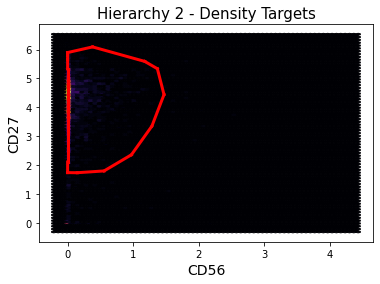

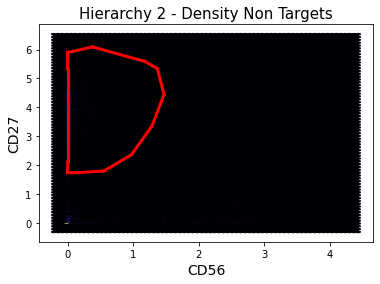

In [9]:
cluster_string = 'new_clust_num'
target_cluster = 'C25'
fraction = 0.0625
final_obs = 50000
print('before subsampling')
print('--------------------------------------------------------------')
print('number of cells : ' +str(len(adata_CV19)))
print('target fraction : ' +str(get_fraction(adata_CV19,cluster_string,target_cluster)))
adata_C25 = get_subsample_fraction_final_obs(adata_CV19,cluster_string,target_cluster,fraction,final_obs)
print(' ')
print('after subsampling')
print('--------------------------------------------------------------')
print('number of cells : ' +str(len(adata_C25)))
print('target fraction : ' +str(get_fraction(adata_C25,cluster_string,target_cluster)))
cg.tools.gating_strategy(adata_C25,[target_cluster],cluster_string = cluster_string,add_noise = True)